In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('Shape of the dataset.')
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Shape of the dataset.
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [3]:
train_labels_count = np.unique(y_train, return_counts=True)
test_labels_count = np.unique(y_test, return_counts=True)
dataframe_labels = pd.DataFrame({'Label':train_labels_count[0], 'Count Train':train_labels_count[1],'Count Test':test_labels_count[1]})
print(dataframe_labels.to_string(index=False))

 Label  Count Train  Count Test
     0         5923         980
     1         6742        1135
     2         5958        1032
     3         6131        1010
     4         5842         982
     5         5421         892
     6         5918         958
     7         6265        1028
     8         5851         974
     9         5949        1009


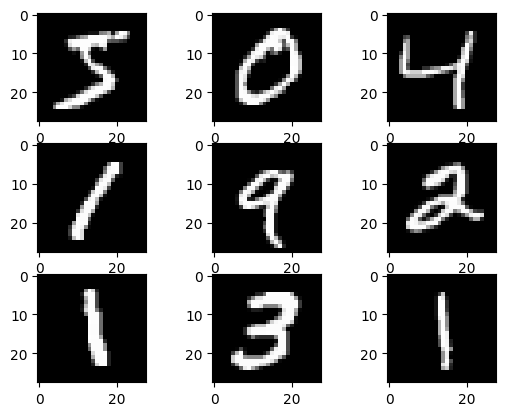

In [4]:
# 9 sample images of the dataset
for i in range(9):
	plt.subplot(331 + i)
	plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [5]:
print('Train dataset ranges from ', X_train.min(),' to ', X_train.max(),'.')
print('Train dataset mean value:', round(X_train.mean(),3))
print('Test dataset ranges from ', X_test.min(),' to ', X_test.max(),'.')
print('Test dataset mean value: ', round(X_test.mean(),3))

Train dataset ranges from  0  to  255 .
Train dataset mean value: 33.318
Test dataset ranges from  0  to  255 .
Test dataset mean value:  33.791


In [6]:
# Reshaping
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize
X_train /= 255.0
X_test /= 255.0
print('Train dataset ranges from ', X_train.min(),' to ', X_train.max(),'.')
print('Train dataset mean value:', round(X_train.mean(),3))
print('Test dataset ranges from ', X_test.min(),' to ', X_test.max(),'.')
print('Test dataset mean value: ', round(X_test.mean(),3))

Train dataset ranges from  0.0  to  1.0 .
Train dataset mean value: 0.131
Test dataset ranges from  0.0  to  1.0 .
Test dataset mean value:  0.133


Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)
Epoch 1/5
469/469 [==============================] - 26s 51ms/step - loss: 0.1966 - accuracy: 0.9426 - val_loss: 0.0783 - val_accuracy: 0.9768
Epoch 2/5
469/469 [==============================] - 22s 46ms/step - loss: 0.0626 - accuracy: 0.9810 - val_loss: 0.0636 - val_accuracy: 0.9789
Epoch 3/5
469/469 [==============================] - 22s 46ms/step - loss: 0.0379 - accuracy: 0.9887 - val_loss: 0.0494 - val_accuracy: 0.9833
Epoch 4/5
469/469 [==============================] - 22s 46ms/step - loss: 0.0240 - accuracy: 0.9929 - val_loss: 0.0555 - val_accuracy: 0.9819
Epoch 5/5
469/469 [==============================] - 22s 47ms/step - loss: 0.0154 - accuracy: 0.9955 - val_loss: 0.0491 - val_accuracy: 0.9839


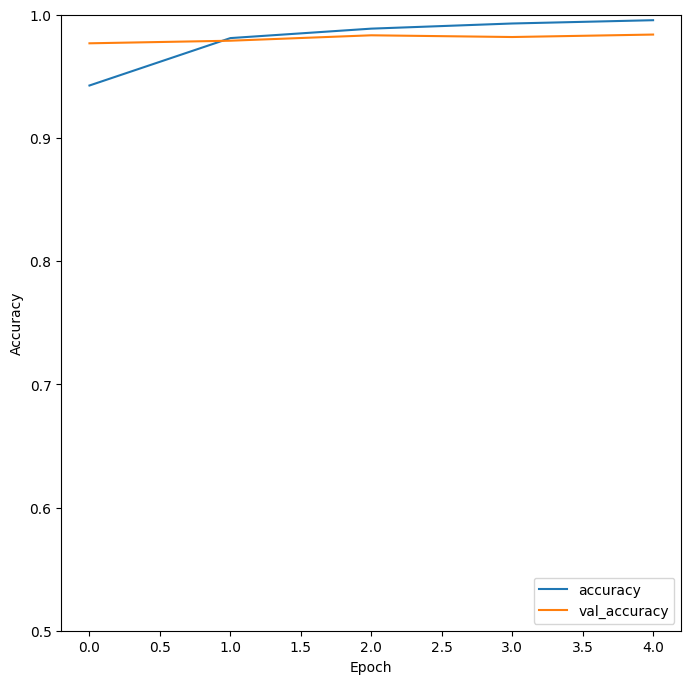

In [7]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from sklearn.metrics import accuracy_score

# one-hot encoding using numpy-related utilities of tensorflow's keras
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

# Compiling the sequential model
# A loss function is one of the two mandatory arguments required for compiling a Keras model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
history = model.fit(X_train, Y_train, batch_size=128, epochs=5, validation_data=(X_test, Y_test))

plt.figure(figsize=(8, 8))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

plt.savefig("output_report.png")

No. of values in test dataset:  10000
1/1 [==============================] - 0s 47ms/step


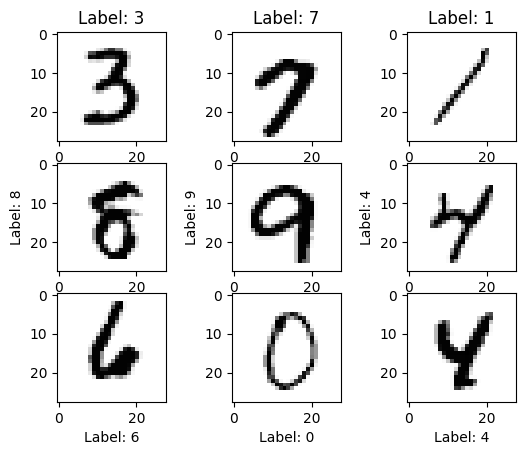

In [11]:
import random as r
print('No. of values in test dataset: ',X_test.shape[0])
for i in range (9):
  image_index=r.randint(0,10000)
  plt.subplot(331 + i)
  plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
  pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
  if i<3:  
    plt.title('Label: ' + str(pred.argmax()))
  elif i>=3 and i<6:
    plt.ylabel('Label: ' + str(pred.argmax()))
  else:
    plt.xlabel('Label: ' + str(pred.argmax()))
plt.show()

In [12]:
import time
expected_label=Y_test[2345].argmax()
digit_image = X_test[2345].reshape(1, 28, 28, 1)
# repeat few times to take the average execution time
loop_count = 10

start_time = time.time()
for i in range(loop_count):
    prediction = model.predict(digit_image)
print("Keras inferences with %s second in average" %((time.time() - start_time) / loop_count))

print(prediction)
predicted_label = prediction.argmax()
print('Predicted value:', predicted_label)
if (expected_label == predicted_label):
  print('Correct prediction !')
else:
  print('Wrong prediction !')
#saving keras model
model.save('./mnist-model.h5')

1/1 [==============================] - 0s 48ms/step
Keras inferences with 0.12486584186553955 second in average
[[1.2830421e-09 5.6534965e-08 1.6347254e-07 6.9750451e-05 2.3122298e-04
  5.7678403e-06 5.0961058e-11 1.9030371e-03 5.0120969e-05 9.9773991e-01]]
Predicted value: 9
Correct prediction !


In [13]:
#!pip install --quiet -U onnxruntime
#!pip install --quiet -U git+https://github.com/microsoft/onnxconverter-common
#!pip install --quiet -U git+https://github.com/onnx/keras-onnx

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Lenovo\\AppData\\Local\\Programs\\Python\\Python310\\Lib\\site-packages\\google\\~upb\\_message.pyd'
Consider using the `--user` option or check the permissions.



In [14]:
import keras2onnx
print("keras2onnx version is "+keras2onnx.__version__)
# convert to onnx model
onnx_model = keras2onnx.convert_keras(model, 'mnist-onnx', debug_mode=1)
output_model_path = "./mnist-model.onnx"
# and save the model in ONNX format
keras2onnx.save_model(onnx_model, output_model_path)

AttributeError: module 'tensorflow.python.keras' has no attribute 'applications'

In [ ]:
import onnxruntime

sess_options = onnxruntime.SessionOptions()
sess = onnxruntime.InferenceSession(output_model_path, sess_options)
data = [digit_image.astype(np.float32)]
input_names = sess.get_inputs()
feed = dict([(input.name, data[n]) for n, input in enumerate(sess.get_inputs())])

In [ ]:
start_time = time.time()
for i in range(loop_count):
    onnx_predicted_label = sess.run(None, feed)[0].argmax()
print("ONNX inferences with %s second in average" %((time.time() - start_time) / loop_count))

print('ONNX predicted value:', onnx_predicted_label)
if (expected_label == onnx_predicted_label):
  print('Correct prediction !')
else:
  print('Wrong prediction !')

if (predicted_label == onnx_predicted_label):
  print("The ONNX's and keras' prediction are matching !")
else:
  print("The ONNX's and keras' prediction does not match !")